<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#PFS-annotation" data-toc-modified-id="PFS-annotation-4.0.1">PFS annotation</a></span></li><li><span><a href="#IHC-annotations" data-toc-modified-id="IHC-annotations-4.0.2">IHC annotations</a></span></li><li><span><a href="#Diversity-annotation" data-toc-modified-id="Diversity-annotation-4.0.3">Diversity annotation</a></span></li><li><span><a href="#TMB-annotation" data-toc-modified-id="TMB-annotation-4.0.4">TMB annotation</a></span></li><li><span><a href="#Age-annotation" data-toc-modified-id="Age-annotation-4.0.5">Age annotation</a></span></li><li><span><a href="#Clinical" data-toc-modified-id="Clinical-4.0.6">Clinical</a></span></li></ul></li></ul></li></ul></div>

# Dependencies

# Functions

In [1]:
source("~/git/iMATRIX-Atezo_Biomarker/R/ggplot2_theme.R")
source("~/git/iMATRIX-Atezo_Biomarker/R/Heatmap_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




# Paths

In [2]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [3]:
metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [4]:
table(metadata$disease_group)


     EWS Lymphoma      NBL       OS   Others      RMS       RT     SARC 
       6       11        9        8        8        8        4        6 
   WILMS 
       6 

Order by treatment duration then by cancer group

In [5]:
metadata <- metadata[order(metadata$cancer, metadata$TRTDUR), ]

### PFS annotation

In [6]:
PFS_ha = HeatmapAnnotation(`Treatment duration` = anno_barplot(metadata$TRTDUR), height = unit(3, "cm"),
                          annotation_name_gp = gpar(fontsize = 20))

### IHC annotations

Make a matrix for IHC

In [7]:
ihc_mat <- metadata[, c("IHC_CD8", "IHC_CD3","IHC_TINFLICP", "IHC_STUILYPC", "IHC_PDL1TC", "IHC_PDL1IC")]

rownames(ihc_mat) <- metadata$sample_id

In [8]:
ihc_mat[is.na(ihc_mat)] <- NA
ihc_mat[ihc_mat == ""] <- NA
ihc_mat[ihc_mat == "<1"] <- 0.5

In [9]:
ihc_mat$IHC_CD8 <- as.numeric(ihc_mat$IHC_CD8)
ihc_mat$IHC_CD3 <- as.numeric(ihc_mat$IHC_CD3)
ihc_mat$IHC_TINFLICP <- as.numeric(ihc_mat$IHC_TINFLICP)
ihc_mat$IHC_STUILYPC <- as.numeric(ihc_mat$IHC_STUILYPC)
ihc_mat$IHC_PDL1TC <- as.numeric(ihc_mat$IHC_PDL1TC)
ihc_mat$IHC_PDL1IC <- as.numeric(ihc_mat$IHC_PDL1IC)

In [10]:
ihc_mat <- as.matrix(ihc_mat)
mode(ihc_mat) <- "numeric"

In [11]:
head(ihc_mat)

,IHC_CD8,IHC_CD3,IHC_TINFLICP,IHC_STUILYPC,IHC_PDL1TC,IHC_PDL1IC
06520060B0022R,2.65,0.0022,3,5,13,15.0
06520097B0021R,3.33,4.1700,1,2,0,0.5
06520100B0017R,2.59,40.7700,5,20,45,55.0
06520033C0018R,3.18,21.3300,70,60,100,15.0
06520003C0012R,0.93,13.7300,0,0,50,60.0
06520099B0017R,3.85,69.1000,40,40,95,20.0


In [12]:
CD8_ha = HeatmapAnnotation(`%CD8+` = anno_barplot(ihc_mat[,1]), height = unit(3, "cm"),
                           annotation_name_gp = gpar(fontsize = 20))

CD3_ha = HeatmapAnnotation(`%CD3+` = anno_barplot(ihc_mat[,2]), height = unit(3, "cm"),
                           annotation_name_gp = gpar(fontsize = 20))

PDL1_TC_ha = HeatmapAnnotation(`%PDL1+ in\n tumour cells` = anno_barplot(ihc_mat[,5]), height = unit(3, "cm"),
                               annotation_name_gp = gpar(fontsize = 20))

PDL1_IC_ha = HeatmapAnnotation(`%PDL1+ in\n immune cells` = anno_barplot(ihc_mat[,6]), height = unit(3, "cm"),
                               annotation_name_gp = gpar(fontsize = 20))

### Diversity annotation

In [13]:
Div_ha = HeatmapAnnotation(`TRb diversity` = anno_barplot(log10(metadata$observed_Shannon), height = unit(3, "cm"),
                                                          axis_param = list(at = c(0,1,2,3),
                                                                            labels = c("1", "10", "100", "1000"))),
                           annotation_name_gp = gpar(fontsize = 20))

### TMB annotation

In [14]:
#recode 0 to 0.01 for log10 transformation
metadata$TMB <- NA
metadata$TMB <- as.numeric(metadata$TMB_Score)
metadata$TMB[metadata$TMB == 0] <- 0.09

In [15]:
TMB_ha = HeatmapAnnotation(`Tumour mutation\nburden` = anno_points(log10(metadata$TMB), height = unit(3,"cm"),
                                                                   axis_param = list(at = c(-1,0, 1, 2),
                                                                                     labels = c("<0.1", "1", "10", "100"))),
                           annotation_name_gp = gpar(fontsize = 20))

### Age annotation

In [16]:
age_ha = HeatmapAnnotation(Age = anno_barplot(metadata$AGE, height = unit(2, "cm")),
                           annotation_name_gp = gpar(fontsize = 20))

### Clinical

In [17]:
mycohort <- metadata$disease_group
names(mycohort) <- metadata$sample_id
mycohorts <- t(as.matrix(mycohort))
rownames(mycohorts) <- "Cohort"

cohorts_hm <- cohorts_hm.fx(mycohorts)

In [18]:
myresponse <- metadata$AVALC
names(myresponse) <- metadata$sample_id
myresponse <- t(as.matrix(myresponse))
rownames(myresponse) <- "Objective response"

response_hm <- response_hm.fx(myresponse)

In [19]:
mycancer <- metadata$cancer
names(mycancer) <- metadata$sample_id
mycancer <- t(as.matrix(mycancer))
rownames(mycancer) <- "Cancer"

cancer_hm <- cancer_hm.fx(mycancer)

In [20]:
metadata$origin <- NA
metadata$origin[ metadata$sample_origin == "Lymph node"] <- "Lymph node"
metadata$origin[ metadata$sample_origin != "Lymph node"] <- "Other tissue"

In [21]:
myorigin <- metadata$origin
names(myorigin) <- metadata$sample_id
myorigin <- t(as.matrix(myorigin))
rownames(myorigin) <- "Lymph node/other tissue"

origin_hm <- origin_hm.fx(myorigin)

In [22]:
mytype <- metadata$tumor_type
names(mytype) <- metadata$sample_id
mytype <- t(as.matrix(mytype))
rownames(mytype) <- "Tumour type"

type_hm <- type_hm.fx(mytype)

In [23]:
heatmaps <- PFS_ha %v% response_hm %v% origin_hm %v%
CD8_ha %v% CD3_ha %v% PDL1_IC_ha %v% PDL1_TC_ha %v% TMB_ha %v% Div_ha 

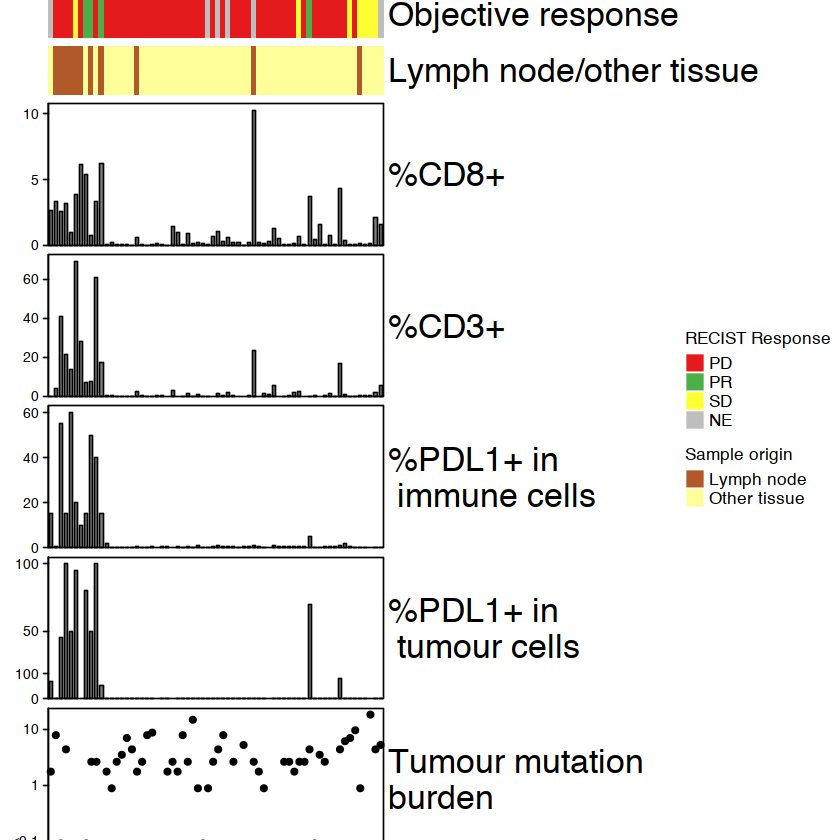

In [24]:
draw(heatmaps)

In [25]:
pdf(paste0(plotpath, "IND_heatmap.pdf"),
   width = 10, height = 20,
   useDingbats = FALSE)

draw(heatmaps,heatmap_legend_side = "bottom")

dev.off()

pdf 
  2